## Final Pre-processing Pipeline

This pipeline involves:

1. A 50% Size Reduction
2. A square crop to 8192x8192
3. A grayscale filter
4. 0.85 Gamma correction
5. Median Blur
6. Combined opening and closing morphological operations
7. Otsu Thresholding (for ground truth only)
8. An extra dimension for Neural Net compatibility

In [ ]:
#imports

from __future__ import print_function
from scipy import misc
from matplotlib import pyplot as plt
from PIL import Image

import cv2
import os
import numpy as np
import PIL.ImageOps  
import glob

In [3]:
def gamma_correction(img, correction):
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[starty:starty+cropy, startx:startx+cropx, :]

def generate_ground_truth(img): 
    face = crop_center(misc.imresize(np.array(cv2.imread(img)),0.5), 8192,8192)
    grayscaled = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    gammaimage = gamma_correction(grayscaled, 0.85)
    median = cv2.medianBlur(gammaimage,15)
    opening = cv2.morphologyEx(cv2.morphologyEx(median, cv2.MORPH_OPEN, (37.88,32.808)), cv2.MORPH_CLOSE, (75.76,65.616))
    retval, otsu = cv2.threshold(opening, 1,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_expanded = otsu[:, :, np.newaxis]
    filename = outputfolder+'Mask_'+'0000'+img[-7:-4]+'.npy'
    np.save(filename,img_expanded)
    print(filename+' done.')
    
def generate_processed_face(img): 
    face = crop_center(misc.imresize(np.array(cv2.imread(img)),0.5), 8192,8192)
    grayscaled = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    gammaimage = gamma_correction(grayscaled, 0.85)
    median = cv2.medianBlur(gammaimage,15)
    opening = cv2.morphologyEx(cv2.morphologyEx(median, cv2.MORPH_OPEN, (37.88,32.808)), cv2.MORPH_CLOSE, (75.76,65.616))
    img_expanded = opening[:, :, np.newaxis]
    filename = outputfolder+'Face_'+'0000'+img[-7:-4]+'.npy'
    np.save(filename,img_expanded)
    print(filename+' done.')

## Initial Exploration

In [ ]:
data_path = '/home/RGD/s3_mount_dir/intestines'

In [7]:
faces = [os.path.join(directory, x) for x in os.listdir(data_path)]

In [ ]:
faces[-5:]

In [22]:
img = cv2.imread(faces[420])

In [17]:
img.shape

(16404, 18940, 3)

In [18]:
img.size

932075280

In [19]:
img.dtype

dtype('uint8')

In [20]:
b,g,r = cv2.split(img)

In [21]:
b.shape

(16404, 18940)

In [22]:
g.shape

(16404, 18940)

In [23]:
r.shape

(16404, 18940)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img, cmap = 'RGB')
plt.title('Example Face'), plt.xticks([]), plt.yticks([])

### Gamma Correction

In [ ]:
for i in np.arange(0,1,0.2):
    gammaimage = gamma_correction(img, i)
    plt.figure(figsize=(20,20))
    plt.imshow(gammaimage,'gray')
    plt.show()

In [ ]:
final_gamma = gamma_correction(img, 0.85)
plt.figure(figsize=(20,20))
plt.imshow(final_gamma, cmap='RGB')
plt.show()

### Morphological Operations

In [26]:
mask = cv2.imread(dirlist[322])

In [35]:
kern_width = 189.4
kern_height = 164.04
scale_open = 0.2
scale_close = 0.4

In [36]:
opening = cv2.morphologyEx(cv2.morphologyEx(cropres, cv2.MORPH_OPEN, (kern_width*scale_open,kern_height*scale_open)), 
                           cv2.MORPH_CLOSE, (kern_width*scale_close,kern_height*scale_close))

In [29]:
mylist1 = [testimg,opening]

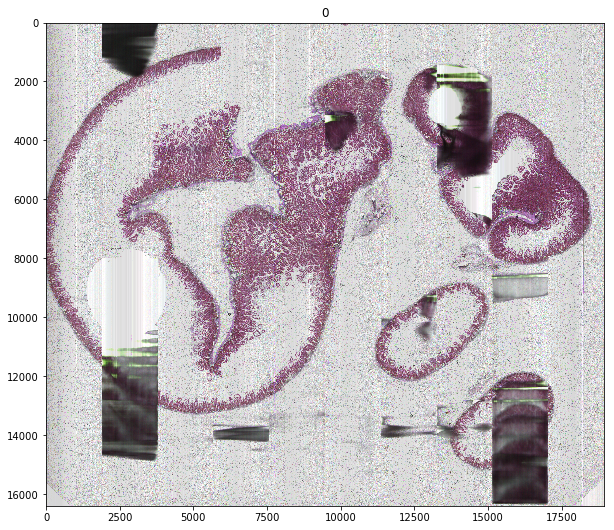

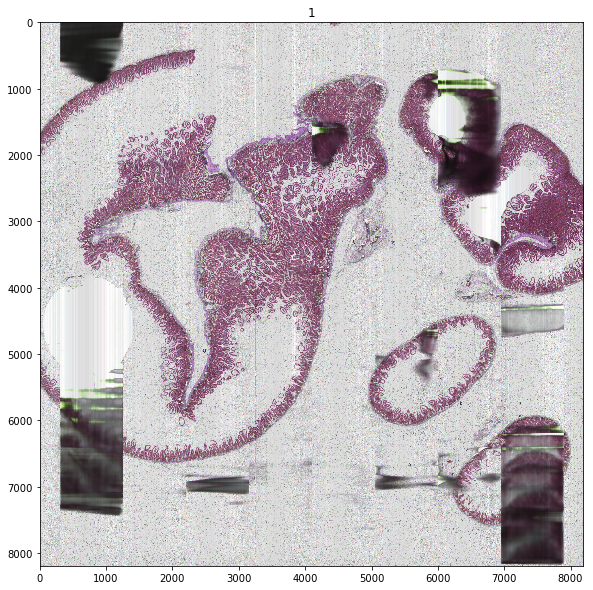

In [34]:
for i in range(2):
    plt.figure(figsize=(10,10))
    plt.title(str(i))
    plt.imshow(mylist1[i])
    plt.show()

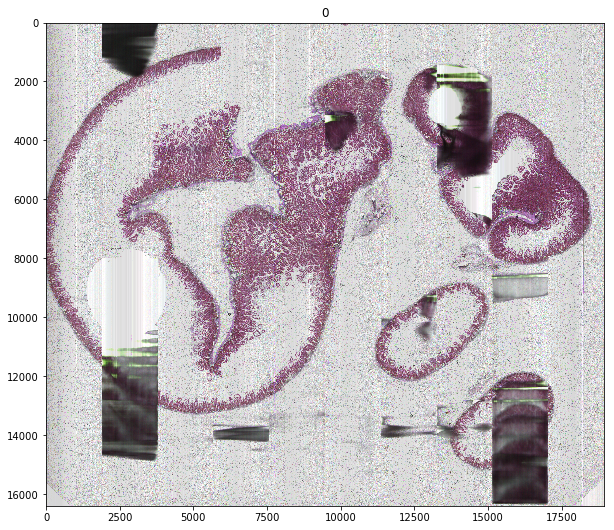

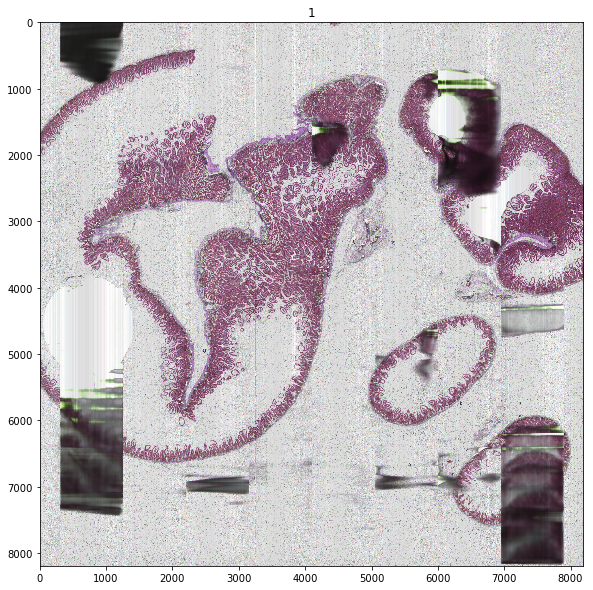

In [37]:
for i in range(2):
    plt.figure(figsize=(10,10))
    plt.title(str(i))
    plt.imshow(mylist1[i])
    plt.show()

### Original Processing

In [49]:
outputfolder = '/home/RGD/cleannpy/fullsize_unnormalized'

In [149]:
for i in faces:
    generate_ground_truth(i)

/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000086.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000130.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000182.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000229.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000274.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000323.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000368.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000418.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000463.npy done.
/home/RGD/s3_mount_dir/npy/newpreprocessed/Face_0000509.npy done.


In [ ]:
for i in faces:
    generate_processed_face(i)